<a href="https://colab.research.google.com/github/HowardHNguyen/Machine-Learning-Deep-Learning/blob/main/Time_Series_Analysis_with_ARIMA_SARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
!pip install tsfresh

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.3/95.3 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.1/169.1 kB 10.3 MB/s eta 0:00:00


In [4]:
# Import relevent dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tsfresh
import statsmodels

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Read the relevant Data series
import pandas as pd
base_series = pd.read_csv('/content/drive/MyDrive/_Python/Machine-Learning-Algorithms/Section 7/Dataset/Dataset/CPI_series_Inflation.csv')

In [7]:
base_series.head()

,Year,CPI_combined,CPI_Headline_Inflation,Date_n
0,02-Jan,48.725055,5.585586,01/01/02
1,02-Feb,48.641907,5.595668,02/01/02
2,02-Mar,48.974501,5.745063,03/01/02
3,02-Apr,49.223947,5.525847,04/01/02
4,02-May,49.556541,5.486726,05/01/02


In [8]:
# Convert object date_n to datetime[64]
import pandas as pd
base_series['date']= pd.to_datetime(base_series['Date_n'])

In [9]:
base_series.head()

,Year,CPI_combined,CPI_Headline_Inflation,Date_n,date
0,02-Jan,48.725055,5.585586,01/01/02,2002-01-01
1,02-Feb,48.641907,5.595668,02/01/02,2002-02-01
2,02-Mar,48.974501,5.745063,03/01/02,2002-03-01
3,02-Apr,49.223947,5.525847,04/01/02,2002-04-01
4,02-May,49.556541,5.486726,05/01/02,2002-05-01


In [10]:
base_series.dtypes

Year                              object
CPI_combined                     float64
CPI_Headline_Inflation           float64
Date_n                            object
date                      datetime64[ns]
dtype: object

In [11]:
# Creating the series with only relevent information
base_series_new=base_series[['date','CPI_Headline_Inflation']]
base_series_new.reset_index(drop=True)
base_series_new.head()

,date,CPI_Headline_Inflation
0,2002-01-01,5.585586
1,2002-02-01,5.595668
2,2002-03-01,5.745063
3,2002-04-01,5.525847
4,2002-05-01,5.486726


In [12]:
# Let's check the data spread
print(base_series_new['date'].max())
print(base_series_new['date'].min())

2018-12-01 00:00:00
2002-01-01 00:00:00


In [13]:
# Check for Missing Values
base_series_new.isnull().sum()

date                      0
CPI_Headline_Inflation    0
dtype: int64

In [14]:
base_series = base_series_new.set_index('date')
base_series.index

DatetimeIndex(['2002-01-01', '2002-02-01', '2002-03-01', '2002-04-01',
               '2002-05-01', '2002-06-01', '2002-07-01', '2002-08-01',
               '2002-09-01', '2002-10-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', name='date', length=204, freq=None)

In [15]:
# Create the Series
y = base_series['CPI_Headline_Inflation'].resample('MS').mean()
y['2018':]

date
2018-01-01    5.065234
2018-02-01    4.441041
2018-03-01    4.278075
2018-04-01    4.576659
2018-05-01    4.870624
2018-06-01    4.924242
2018-07-01    4.172876
2018-08-01    3.692762
2018-09-01    3.772189
2018-10-01    3.379868
2018-11-01    2.325581
2018-12-01    2.186589
Freq: MS, Name: CPI_Headline_Inflation, dtype: float64

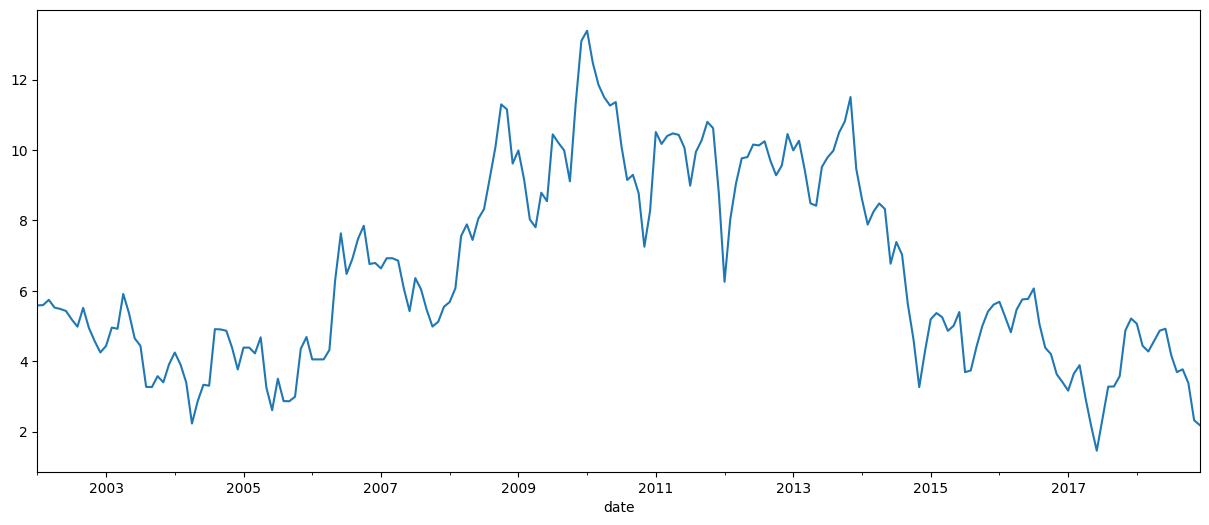

In [16]:
# Visualizing Inflation Time Series Data
y.plot(figsize=(15, 6))
plt.show()

# Alternative Visualization

In [19]:
# Install Plotly
!pip install plotly

# Import Plotly
import plotly.graph_objects as go

In [21]:
# Please make sure you have installed the plotly and cufflinks for this type of Visualization.
# For Plotly you would require user name and API to access this chart
import plotly
#plotly.tools.set_credentials_file(username='*******', api_key='****')

In [32]:
#import plotly.plotly as ply
import cufflinks as cf
#base_series.iplot(title="CPI Inflation Data - 2002 to 2016")

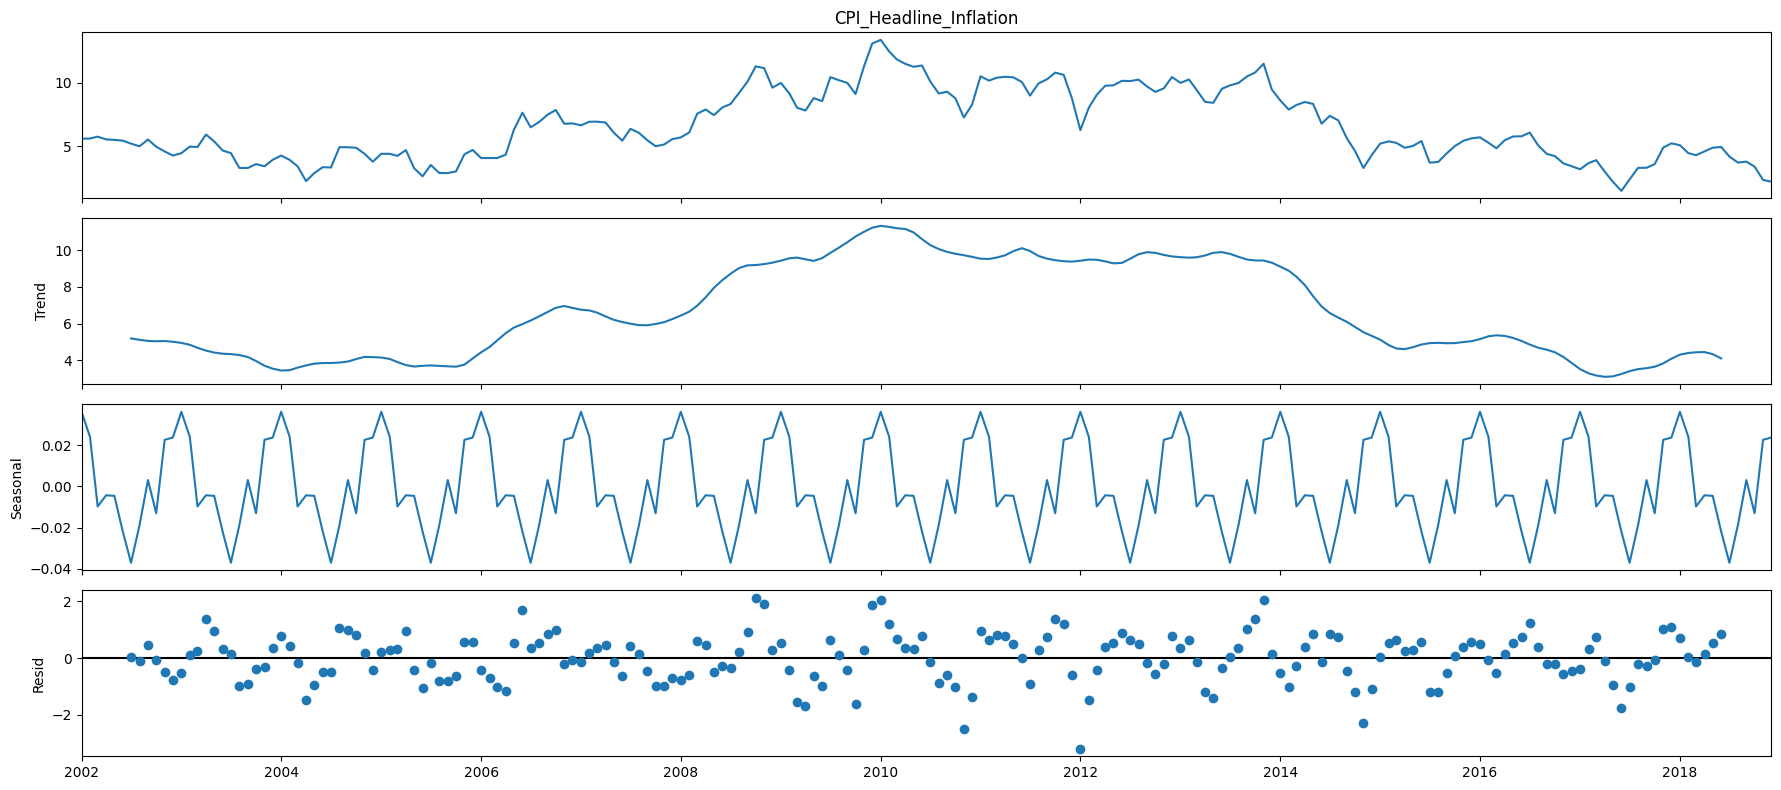

In [23]:
# Check for various component of the Time Series
import statsmodels as sm
from statsmodels.graphics import utils
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition_add = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition_add.plot()
plt.show()

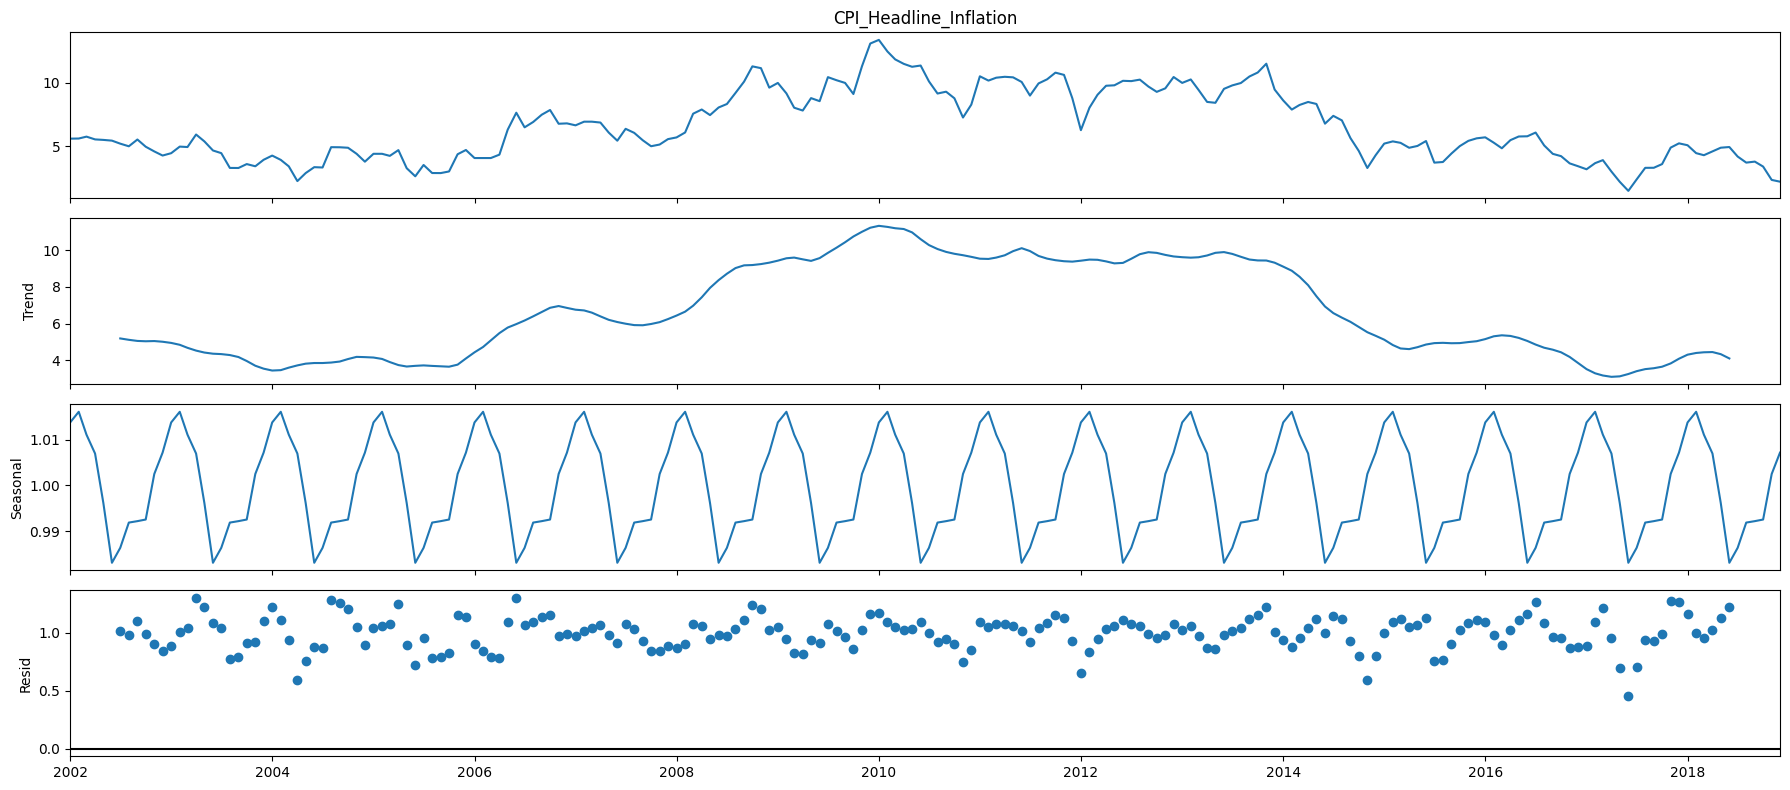

In [24]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition_mul = sm.tsa.seasonal_decompose(y, model='multiplicative')
fig = decomposition_mul.plot()
plt.show()

In [25]:
# A Quick check of stationarity
#Run ADF test on the original time series
from statsmodels.tsa import stattools
from statsmodels.tsa import seasonal
adf_result = stattools.adfuller(base_series['CPI_Headline_Inflation'], autolag='AIC')
print('p-val of the ADF test on irregular variations in CPI series data:', adf_result[1])

p-val of the ADF test on irregular variations in CPI series data: 0.8100920142967419


In [26]:
#Run ADF test on the irregular variations - Multiplicative Model
adf_result = stattools.adfuller(decomposition_add.resid[np.where(np.isfinite(decomposition_add.resid))[0]],
                                autolag='AIC')
print('p-val of the ADF test on irregular variations in CPI Data:', adf_result[1])

p-val of the ADF test on irregular variations in CPI Data: 3.333916863245623e-08


In [27]:
#Run ADF test on the irregular variations - Multiplicative Model
adf_result = stattools.adfuller(decomposition_mul.resid[np.where(np.isfinite(decomposition_mul.resid))[0]],
                                autolag='AIC')
print('p-val of the ADF test on irregular variations in CPI Data:', adf_result[1])

p-val of the ADF test on irregular variations in CPI Data: 7.405904805471308e-08


# Differencing - Basic check for Stationarity

In [28]:
# First Order Differencing
first_order_diff = base_series['CPI_Headline_Inflation'].diff(1)

Text(0.5, 1.0, 'First-order differences of CPI data - 2000 to 2018')

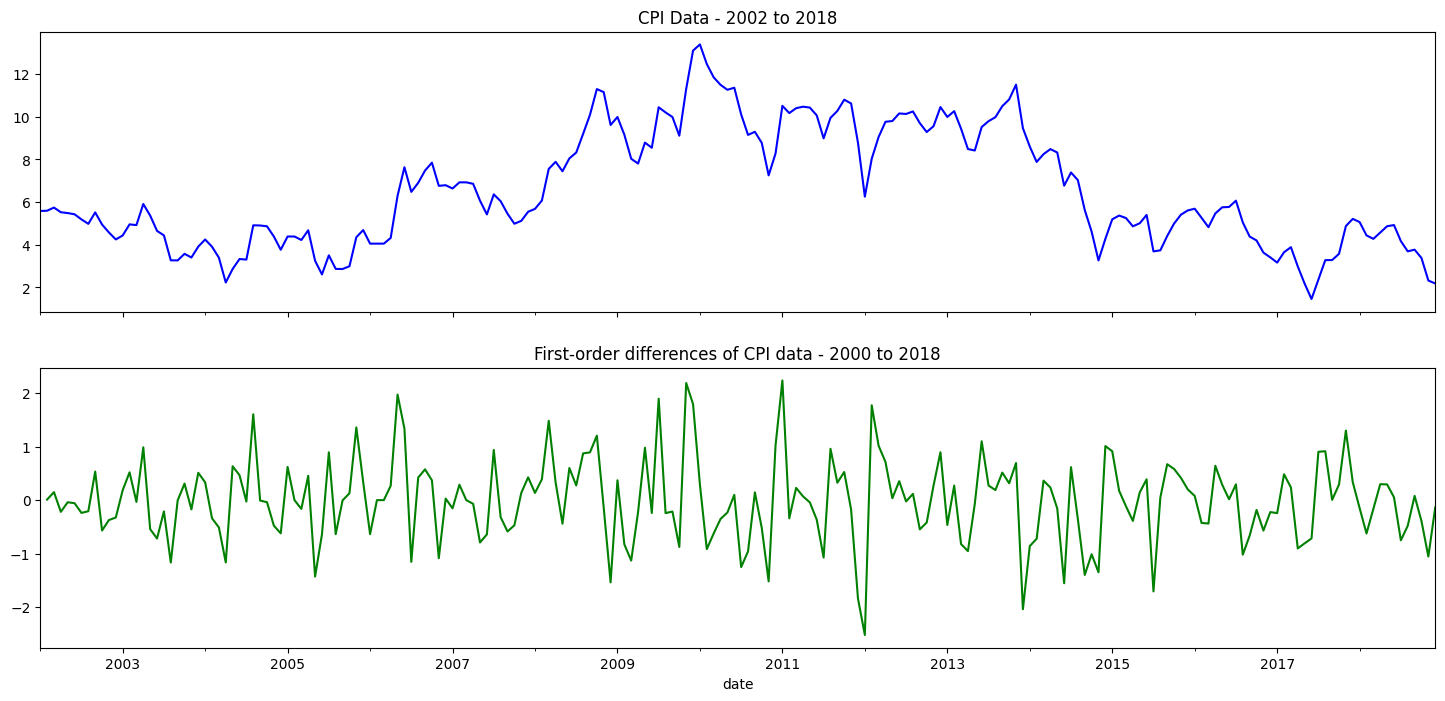

In [29]:
#Let us plot the original time series and first-differences
fig, ax = plt.subplots(2, sharex=True)
base_series['CPI_Headline_Inflation'].plot(ax=ax[0], color='b')
ax[0].set_title('CPI Data - 2002 to 2018')
first_order_diff.plot(ax=ax[1], color='g')
ax[1].set_title('First-order differences of CPI data - 2000 to 2018')

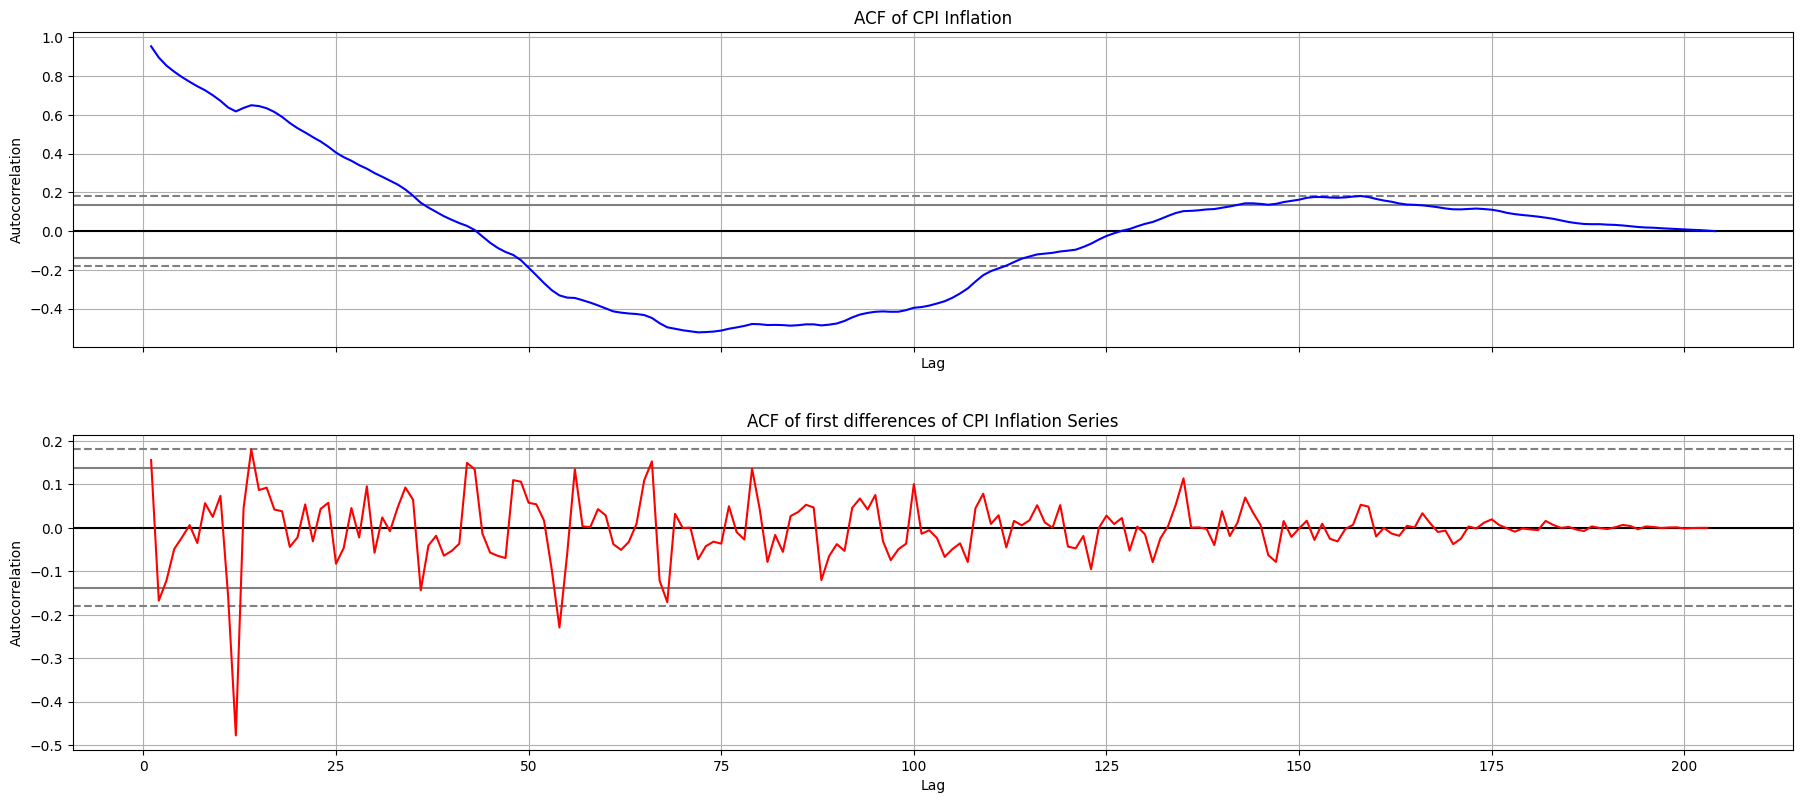

In [30]:
#Let us plot the ACFs of original time series and first-differences
from pandas.plotting import autocorrelation_plot
fig, ax = plt.subplots(2, sharex=True)
autocorrelation_plot(base_series['CPI_Headline_Inflation'], color='b', ax=ax[0])
ax[0].set_title('ACF of CPI Inflation')
autocorrelation_plot(first_order_diff.iloc[1:], color='r', ax=ax[1])
ax[1].set_title('ACF of first differences of CPI Inflation Series')
plt.tight_layout(pad=0.6, w_pad=0.6, h_pad=3.0)

Now we could perform the Ljung-Box test on the ACFs of the original time series and the first-differences.
For running the test we can limit upto specified Lags

# Building the ARIMA Model

In [33]:
base_series.index = pd.to_datetime(base_series.index)

In [34]:
base_series.columns = ['CPI_Headline_Inflation']

In [35]:
base_series.head()

,CPI_Headline_Inflation
date,
2002-01-01,5.585586
2002-02-01,5.595668
2002-03-01,5.745063
2002-04-01,5.525847
2002-05-01,5.486726


In [37]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.9 MB/s eta 0:00:00


In [38]:
# We will be using pmdarima package
import pmdarima

In [39]:
# Grid-Search and Cross Validation
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(base_series, start_p=1, start_q=1,
                           max_p=5, max_q=5, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=4.55 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=659.625, Time=0.15 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=542.639, Time=0.81 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=3.36 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=657.697, Time=0.19 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=517.380, Time=1.59 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=11.50 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=4.56 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=520.672, Time=1.13 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=513.874, Time=2.73 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=537.898, Time=1.49 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=7.37 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=2.03 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=513.689, Time=0.64 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=537.365, Time

In [40]:
stepwise_model.aic()

512.0195925711841

In [41]:
# Train-Test Split
train_cpi = base_series.loc['2002-01-01':'2018-06-01']
test_cpi = base_series.loc['2018-07-01':]

In [42]:
train_cpi.tail()

,CPI_Headline_Inflation
date,
2018-02-01,4.441041
2018-03-01,4.278075
2018-04-01,4.576659
2018-05-01,4.870624
2018-06-01,4.924242


In [43]:
test_cpi.head(6)

,CPI_Headline_Inflation
date,
2018-07-01,4.172876
2018-08-01,3.692762
2018-09-01,3.772189
2018-10-01,3.379868
2018-11-01,2.325581
2018-12-01,2.186589


In [44]:
# Fit the Model with the Train Data
stepwise_model.fit(train_cpi)

ARIMA(order=(2, 1, 1), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [45]:
# Generating Forecast
# Evaluation
future_forecast = stepwise_model.predict(n_periods=6)

In [46]:
future_forecast

2018-07-01    4.495210
2018-08-01    3.944194
2018-09-01    3.740803
2018-10-01    3.829277
2018-11-01    3.768244
2018-12-01    3.736790
Freq: MS, dtype: float64

In [48]:
!pip install chart_studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 769.4 kB/s eta 0:00:00


In [51]:
!pip install plotly

In [56]:
import plotly.graph_objects as go
import pandas as pd

# Configure Plotly credentials (replace 'your_username' and 'your_api_key' with your Plotly username and API key)
go.Figure().show(renderer="colab")

In [58]:
import chart_studio
import chart_studio.plotly as py
import plotly.graph_objects as go
import pandas as pd

# Set your Plotly credentials
chart_studio.tools.set_credentials_file(username='howardnguyen', api_key='ESRW9ADmRxO2VnvlqQFb')

# Compare the results
future_forecast = pd.DataFrame(future_forecast, index=test_cpi.index, columns=['Forecast'])
pd.concat([test_cpi, future_forecast], axis=1).iplot()

In [59]:
pd.concat([base_series,future_forecast],axis=1).iplot()

In [60]:
# Calculating MAPE for the last 6 Month's data
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [61]:
pred = pd.concat([test_cpi,future_forecast],axis=1)
mean_absolute_percentage_error(pred['CPI_Headline_Inflation'],pred['Forecast'])

26.932045149870493

In [62]:
pred.head()

,CPI_Headline_Inflation,Forecast
date,,
2018-07-01,4.172876,4.495210
2018-08-01,3.692762,3.944194
2018-09-01,3.772189,3.740803
2018-10-01,3.379868,3.829277
2018-11-01,2.325581,3.768244


In [63]:
# We can evaluate the model using statsmodels
import warnings
warnings.filterwarnings('ignore')

best_model=sm.tsa.statespace.SARIMAX(train_cpi, order=(3, 1, 1),
                                    seasonal_order=(2, 1, 1, 12)).fit(disp=-1)
print(best_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:             CPI_Headline_Inflation   No. Observations:                  198
Model:             SARIMAX(3, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -210.138
Date:                            Sat, 20 Jan 2024   AIC                            436.275
Time:                                    06:27:33   BIC                            462.038
Sample:                                01-01-2002   HQIC                           446.716
                                     - 06-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6237      0.175     -3.565      0.000      -0.967      -0.281
ar.L2          0.0392      0.085   

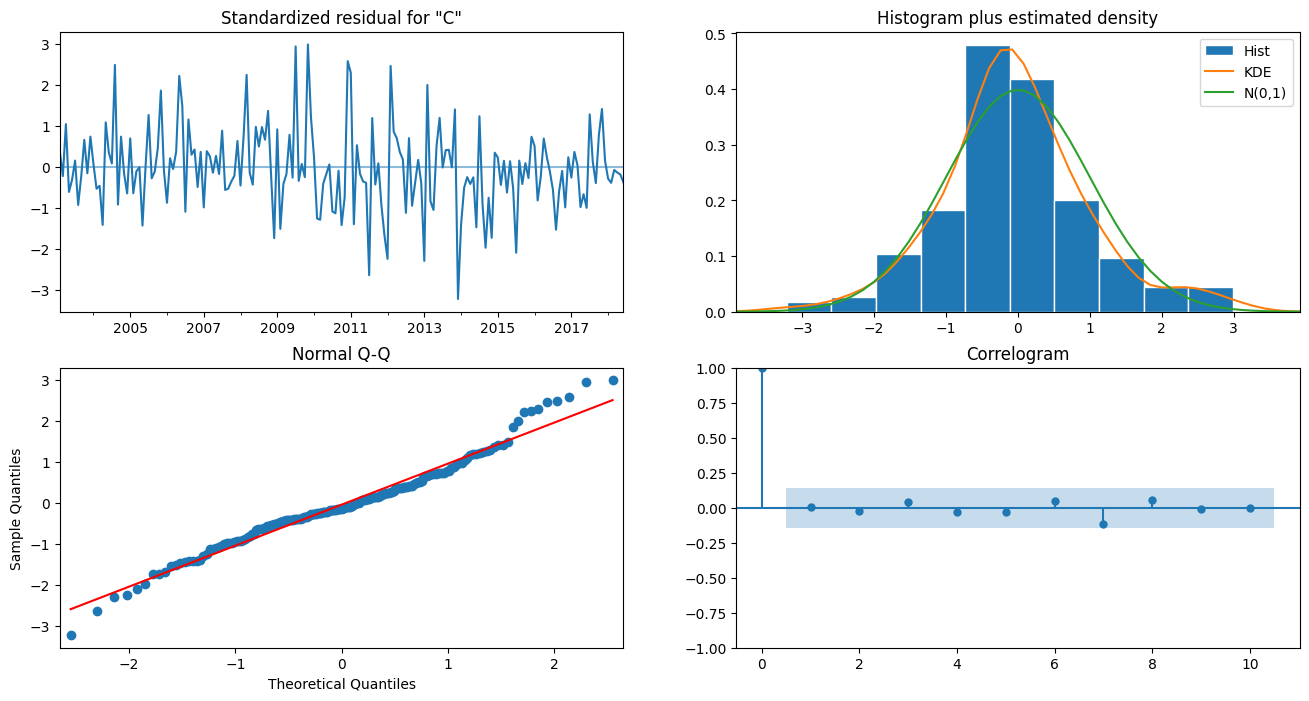

In [64]:
# Check the Model Diagnostics
best_model.plot_diagnostics(figsize=(16, 8))
plt.show()

# HW assignment - Holt Winter Exponential Smoothing method

In [65]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

A good choice of Time Series model for forecasting data with no clear trend or seasonal pattern.
Forecasts are calculated using weighted averages,
which means the largest weights are associated with most recent observations, while the smallest
weights are associated with the oldest observations:

The weights decrease rate is controlled by the smoothing parameter α. If α is large (i.e., close to 1), more weight is given to the more recent observations. There are 2 extreme cases:

α=0: the forecasts of all future values are equal to the average (or “mean”) of the historical data, which is called Average method.
α=1: simply set all forecasts to be the value of the last observation, which is called Naive method..

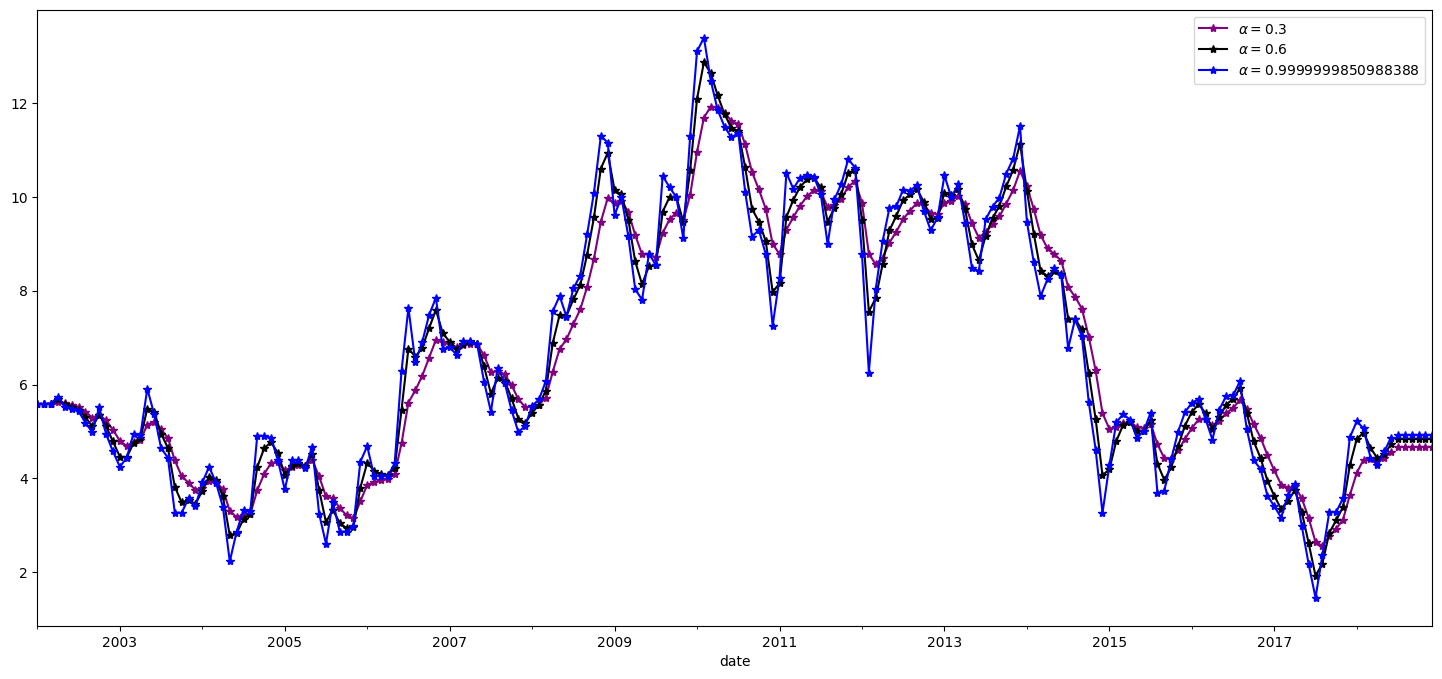

2018-07-01    4.673039
2018-08-01    4.673039
2018-09-01    4.673039
2018-10-01    4.673039
2018-11-01    4.673039
2018-12-01    4.673039
Freq: MS, Name: $\alpha=0.3$, dtype: float64
2018-07-01    4.8463
2018-08-01    4.8463
2018-09-01    4.8463
2018-10-01    4.8463
2018-11-01    4.8463
2018-12-01    4.8463
Freq: MS, Name: $\alpha=0.6$, dtype: float64
2018-07-01    4.924242
2018-08-01    4.924242
2018-09-01    4.924242
2018-10-01    4.924242
2018-11-01    4.924242
2018-12-01    4.924242
Freq: MS, Name: $\alpha=0.9999999850988388$, dtype: float64


In [66]:
# Simple Exponential Smoothing
model_SES_1 = SimpleExpSmoothing(train_cpi).fit(smoothing_level=0.3,optimized=False)
pred_1 = model_SES_1.forecast(6).rename(r'$\alpha=0.3$')
# plot
pred_1.plot(marker='*', color='purple', legend=True)
model_SES_1.fittedvalues.plot(marker='*',  color='purple')



model_SES_2 = SimpleExpSmoothing(train_cpi).fit(smoothing_level=0.6,optimized=False)
pred_2 = model_SES_2.forecast(6).rename(r'$\alpha=0.6$')
# plot
pred_2.plot(marker='*', color='black', legend=True)
model_SES_2.fittedvalues.plot(marker='*', color='black')


model_SES_3 = SimpleExpSmoothing(train_cpi).fit(optimized=True)
pred_3 = model_SES_3.forecast(6).rename(r'$\alpha=%s$'%model_SES_3.model.params['smoothing_level'])
# plot
pred_3.plot(marker='*', color='blue', legend=True)
model_SES_3.fittedvalues.plot(marker='*', color='blue')

plt.show()

print(pred_1)
print(pred_2)
print(pred_3)

# Holt's Method
A logical extension of simple exponential smoothing (solution to data with no clear trend or seasonality).
Holt’s method involves a forecast equation and two smoothing equations (one for the level and one for the trend)

For long-term forecast, forecasting with
Holt’s method will increase or decrease indefinitely into the future. In this case, we use the Damped trend method

# Holt-Winters’ Method
This method is suitable for data with trends and
seasonalities which includes a seasonality smoothing parameter γ. There are two variations to this method:
"Additive Model" and "Multiplicative Model"

In model_HW_1, we use additive trend, additive seasonal of period season_length=6 and a Box-Cox transformation.
In model_HW_2, we use additive damped trend, additive seasonal of period season_length=6 and a Box-Cox transformation.

In [70]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Example: Initializing the model with use_boxcox=True
model_HW_1 = ExponentialSmoothing(train_cpi, seasonal_periods=6, trend='add', seasonal='add', use_boxcox=True).fit()

# Example: Initializing the model with use_boxcox=False
model_HW_2 = ExponentialSmoothing(train_cpi, seasonal_periods=6, trend='add', seasonal='add', damped=True, use_boxcox=False).fit()

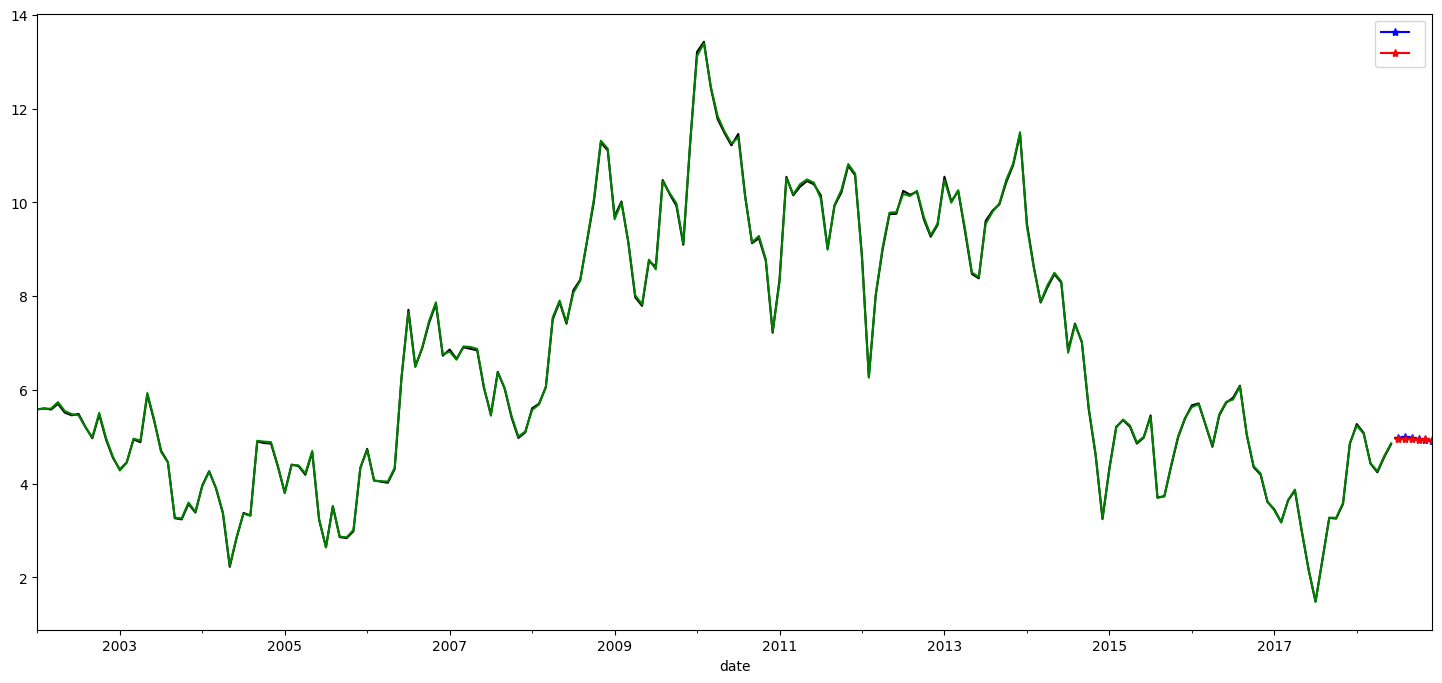

Forecasting : Holt-Winters method with additive Seasonality.
2018-07-01    4.978789
2018-08-01    4.997602
2018-09-01    4.983766
2018-10-01    4.944096
2018-11-01    4.933498
2018-12-01    4.906755
Freq: MS, dtype: float64
2018-07-01    4.945988
2018-08-01    4.948530
2018-09-01    4.944497
2018-10-01    4.929826
2018-11-01    4.943469
2018-12-01    4.931388
Freq: MS, dtype: float64


In [72]:
#model_HW_1 = ExponentialSmoothing(train_cpi, seasonal_periods=6, trend='add', seasonal='add').fit(use_boxcox=True)
#model_HW_2 = ExponentialSmoothing(train_cpi, seasonal_periods=6, trend='add', seasonal='add', damped=True).fit(use_boxcox=True)

model_HW_1 = ExponentialSmoothing(train_cpi, seasonal_periods=6, trend='add', seasonal='add', use_boxcox=True).fit()
model_HW_2 = ExponentialSmoothing(train_cpi, seasonal_periods=6, trend='add', seasonal='add', damped=True, use_boxcox=False).fit()

model_HW_1.fittedvalues.plot(style='-', color='black')
model_HW_2.fittedvalues.plot(style='-', color='green')

model_HW_1.forecast(6).plot(style='-', marker='*', color='blue', legend=True)
model_HW_2.forecast(6).plot(style='-', marker='*', color='red', legend=True)

plt.show()
print("Forecasting : Holt-Winters method with additive Seasonality.")

pred_hw_1 = model_HW_1.forecast(6)
pred_hw_2 = model_HW_2.forecast(6)

print(pred_hw_1)
print(pred_hw_2)